# IMPORTING LIBRARIES:

In [1]:
import os
import os.path
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
import cv2
%matplotlib inline

In [3]:
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# LOADING DATA:

In [4]:
import zipfile
import os


os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [5]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

 97% 273M/281M [00:03<00:00, 59.9MB/s]
100% 281M/281M [00:03<00:00, 75.8MB/s]


In [6]:
zip_ref = zipfile.ZipFile('/content/indian-sign-language-isl.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [7]:
len(os.listdir('/tmp/Indian'))

35

Main:

In [8]:
path = Path("../tmp/Indian")

Images:

In [9]:
img = list(path.glob(r"*/*.jpg"))

In [10]:
img

[PosixPath('../tmp/Indian/W/882.jpg'),
 PosixPath('../tmp/Indian/W/87.jpg'),
 PosixPath('../tmp/Indian/W/744.jpg'),
 PosixPath('../tmp/Indian/W/817.jpg'),
 PosixPath('../tmp/Indian/W/416.jpg'),
 PosixPath('../tmp/Indian/W/664.jpg'),
 PosixPath('../tmp/Indian/W/492.jpg'),
 PosixPath('../tmp/Indian/W/169.jpg'),
 PosixPath('../tmp/Indian/W/514.jpg'),
 PosixPath('../tmp/Indian/W/702.jpg'),
 PosixPath('../tmp/Indian/W/737.jpg'),
 PosixPath('../tmp/Indian/W/1029.jpg'),
 PosixPath('../tmp/Indian/W/49.jpg'),
 PosixPath('../tmp/Indian/W/150.jpg'),
 PosixPath('../tmp/Indian/W/992.jpg'),
 PosixPath('../tmp/Indian/W/974.jpg'),
 PosixPath('../tmp/Indian/W/998.jpg'),
 PosixPath('../tmp/Indian/W/1096.jpg'),
 PosixPath('../tmp/Indian/W/486.jpg'),
 PosixPath('../tmp/Indian/W/435.jpg'),
 PosixPath('../tmp/Indian/W/1088.jpg'),
 PosixPath('../tmp/Indian/W/383.jpg'),
 PosixPath('../tmp/Indian/W/915.jpg'),
 PosixPath('../tmp/Indian/W/873.jpg'),
 PosixPath('../tmp/Indian/W/343.jpg'),
 PosixPath('../tmp/India

In [11]:
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],img))

In [12]:
img_series = pd.Series(img,name="JPG").astype(str)
Labels_Series = pd.Series(Labels,name="CATEGORY")

In [13]:
img_series

0        ../tmp/Indian/W/882.jpg
1         ../tmp/Indian/W/87.jpg
2        ../tmp/Indian/W/744.jpg
3        ../tmp/Indian/W/817.jpg
4        ../tmp/Indian/W/416.jpg
                  ...           
42740     ../tmp/Indian/L/96.jpg
42741    ../tmp/Indian/L/608.jpg
42742    ../tmp/Indian/L/820.jpg
42743     ../tmp/Indian/L/43.jpg
42744    ../tmp/Indian/L/732.jpg
Name: JPG, Length: 42745, dtype: object

In [14]:
Data = pd.concat([img_series,Labels_Series],axis=1)

In [15]:
Data.head()

,JPG,CATEGORY
0,../tmp/Indian/W/882.jpg,W
1,../tmp/Indian/W/87.jpg,W
2,../tmp/Indian/W/744.jpg,W
3,../tmp/Indian/W/817.jpg,W
4,../tmp/Indian/W/416.jpg,W


Randomizing the dataset:

In [16]:
Data = Data.sample(frac=1).reset_index(drop=True)

In [17]:
Data.head()

,JPG,CATEGORY
0,../tmp/Indian/R/89.jpg,R
1,../tmp/Indian/8/943.jpg,8
2,../tmp/Indian/Z/1182.jpg,Z
3,../tmp/Indian/V/433.jpg,V
4,../tmp/Indian/5/427.jpg,5


# Display image:

In [18]:
tst_img = Data["JPG"][12]

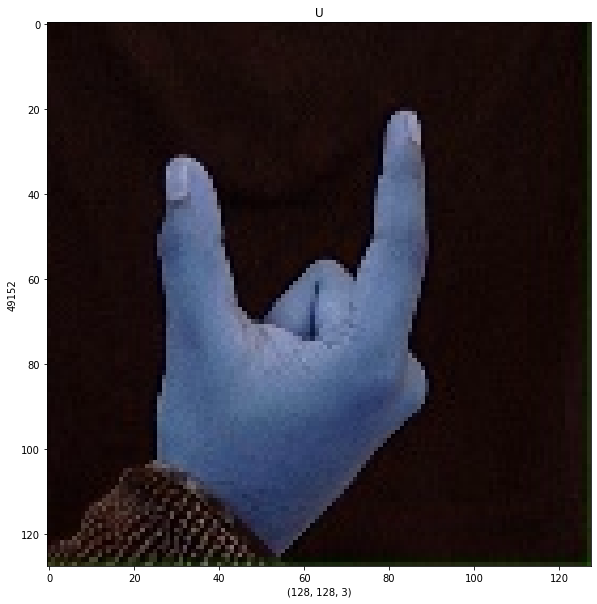

In [19]:
figure = plt.figure(figsize=(10,10))
Image_Sign = cv2.imread(tst_img)

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Data["CATEGORY"][12])
plt.imshow(Image_Sign)

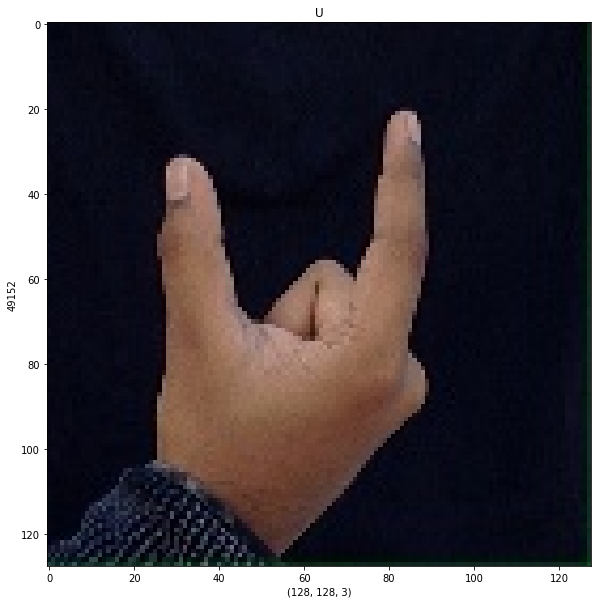

In [20]:
figure = plt.figure(figsize=(10,10))
Image_Sign = cv2.cvtColor(cv2.imread(tst_img),cv2.COLOR_BGR2RGB)

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Data["CATEGORY"][12])
plt.imshow(Image_Sign)

# Threshold and Edges(canny): *OPTIONAL

In [ ]:
Image_Sign = cv2.cvtColor(cv2.imread(tst_img),cv2.COLOR_BGR2RGB)
Gray_Img = cv2.cvtColor(Image_Sign,cv2.COLOR_RGB2GRAY)
rslt,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
Canny_Img = cv2.Canny(threshold_Img,10,100)


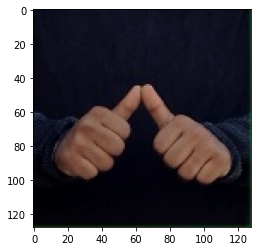

In [ ]:
plt.imshow(Image_Sign)

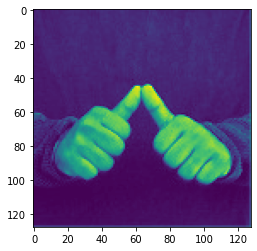

In [ ]:
plt.imshow(Gray_Img)

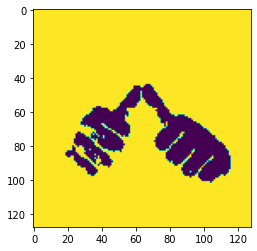

In [ ]:
plt.imshow(threshold_Img)

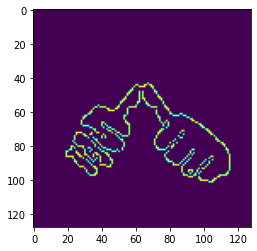

In [ ]:
plt.imshow(Canny_Img)

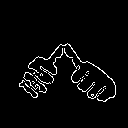

In [ ]:
cv2_imshow(Canny_Img)

# *OPTIONAL RESIZING:

In [ ]:
def img_resize(path):
  width = 64
  height = 64
  scaled = cv2.resize(cv2.imread(path), (width, height), interpolation=cv2.INTER_AREA)
  return scaled


In [ ]:
Image_Sign.shape

(128, 128, 3)

In [ ]:
width = 64
height = 64

In [ ]:
scaled = cv2.resize(cv2.imread(Data["JPG"][12]), (width, height), interpolation=cv2.INTER_AREA)
print(scaled.shape)

(64, 64, 3)


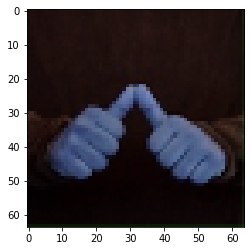

In [ ]:
plt.imshow(scaled)

In [ ]:
Gray_Img = cv2.cvtColor(scaled,cv2.COLOR_RGB2GRAY)
rslt,thresh = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)

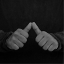

In [ ]:
cv2_imshow(Gray_Img)

In [ ]:
Canny_Img = cv2.Canny(thresh,10,100)

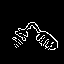

In [ ]:
cv2_imshow(Canny_Img)

# Train test split:

In [21]:
from sklearn.model_selection import train_test_split
X_Train,X_Test = train_test_split(Data,test_size=0.3,random_state=52,shuffle=True)

In [22]:
print(X_Train.shape)
print(X_Test.shape)

(29921, 2)
(12824, 2)


#CNN Model:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
target_size = (128,128)
batch_size = 1

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_dataframe(X_Train, x_col='JPG', y_col='CATEGORY', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(X_Test, x_col='JPG', y_col='CATEGORY', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')

Found 29921 validated image filenames belonging to 35 classes.
Found 12824 validated image filenames belonging to 35 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_gen, epochs=1, verbose=1)

468/468 [==============================] - 350s 747ms/step - loss: 0.0186 - accuracy: 0.9959


In [ ]:
best_model = model
best_model.evaluate(test_gen)

201/201 [==============================] - 51s 252ms/step - loss: 0.0073 - accuracy: 0.9978


[0.007270032539963722, 0.9978166222572327]

#MLP Model:

In [ ]:
imgs, labels = next(train_gen)

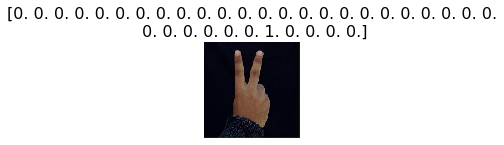

In [ ]:
def plots(ims, figsize=(12,6), rows=3, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3):
            ims = np.squeeze(ims)
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

plots(imgs, titles=labels)

In [ ]:
len(train_gen)

29921

In [ ]:
data = train_gen[10][0]
data = np.squeeze(data)

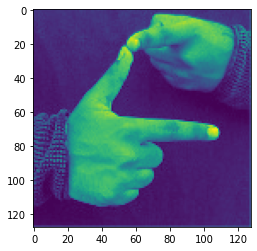

In [ ]:
plt.imshow(data)

In [ ]:
np.array(image)
image.shape

(128, 128, 3)

In [ ]:
len(train_gen)

29921

In [ ]:
29921/32

935.03125

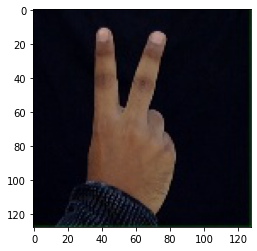

In [ ]:
plt.imshow(image)

In [ ]:
main = np.empty((0,128, 128, 3))
main_y = np.empty((0))


In [ ]:
import time
import math
batch_size = math.floor(29921/32)


start = 0
main=np.concatenate([train_gen.next()[0] for i in range(start,start+batch_size)])
main_y=np.concatenate([train_gen.next()[1] for i in range(start,start+batch_size)])
time.sleep(1)

 
 
for i in range (1,32):
  start = i*batch_size
  x=np.concatenate([train_gen.next()[0] for i in range(start,start+batch_size)])
  y=np.concatenate([train_gen.next()[1] for i in range(start,start+batch_size)])
  time.sleep(1)
  main = np.concatenate((main,x))
  main_y = np.concatenate((main_y,y))

  print(main.shape)
  print(main_y.shape)
  

(1870, 128, 128, 3)
(1870, 35)
(2805, 128, 128, 3)
(2805, 35)
(3740, 128, 128, 3)
(3740, 35)
(4675, 128, 128, 3)
(4675, 35)
(5610, 128, 128, 3)
(5610, 35)
(6545, 128, 128, 3)
(6545, 35)
(7480, 128, 128, 3)
(7480, 35)
(8415, 128, 128, 3)
(8415, 35)
(9350, 128, 128, 3)
(9350, 35)
(10285, 128, 128, 3)
(10285, 35)
(11220, 128, 128, 3)
(11220, 35)
(12155, 128, 128, 3)
(12155, 35)
(13090, 128, 128, 3)
(13090, 35)
(14025, 128, 128, 3)
(14025, 35)
(14960, 128, 128, 3)
(14960, 35)
(15895, 128, 128, 3)
(15895, 35)
(16830, 128, 128, 3)
(16830, 35)
(17765, 128, 128, 3)
(17765, 35)
(18700, 128, 128, 3)
(18700, 35)
(19635, 128, 128, 3)
(19635, 35)
(20570, 128, 128, 3)
(20570, 35)
(21505, 128, 128, 3)
(21505, 35)
(22440, 128, 128, 3)
(22440, 35)
(23375, 128, 128, 3)
(23375, 35)
(24310, 128, 128, 3)
(24310, 35)
(25245, 128, 128, 3)
(25245, 35)
(26180, 128, 128, 3)
(26180, 35)
(27115, 128, 128, 3)
(27115, 35)
(28050, 128, 128, 3)
(28050, 35)
(28985, 128, 128, 3)
(28985, 35)
(29920, 128, 128, 3)
(29920,

In [ ]:
main = main.reshape((main.shape[0],-1))

In [ ]:
main.shape

(29920, 49152)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [ ]:
def base_model():
  model=Sequential()
  model.add(Dense(100, input_shape = (49152,), activation = 'sigmoid'))
  model.add(Dense(100, activation = 'sigmoid'))
  model.add(Dense(100, activation = 'sigmoid'))
  model.add(Dense(100, activation = 'sigmoid'))
  model.add(Dense(100, activation = 'sigmoid'))
  model.add(Dense(35, activation='softmax'))
  sgd = optimizers.SGD()
  model.compile(optimizer = sgd,loss ='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model_1 = base_model()
history = model_1.fit(main,main_y,batch_size = 20,validation_split=0.3,epochs = 5,verbose = 1)

Epoch 1/5
1048/1048 [==============================] - 37s 35ms/step - loss: 3.5675 - accuracy: 0.0318 - val_loss: 3.5575 - val_accuracy: 0.0377
Epoch 2/5
1048/1048 [==============================] - 29s 28ms/step - loss: 3.5587 - accuracy: 0.0301 - val_loss: 3.5566 - val_accuracy: 0.0284
Epoch 3/5
1048/1048 [==============================] - 30s 29ms/step - loss: 3.5582 - accuracy: 0.0310 - val_loss: 3.5590 - val_accuracy: 0.0270
Epoch 4/5
1048/1048 [==============================] - 30s 29ms/step - loss: 3.5580 - accuracy: 0.0316 - val_loss: 3.5570 - val_accuracy: 0.0332
Epoch 5/5
1048/1048 [==============================] - 29s 28ms/step - loss: 3.5582 - accuracy: 0.0328 - val_loss: 3.5558 - val_accuracy: 0.0299


In [ ]:
from numpy import asarray
from numpy import savetxt
# define data
# save to csv file
savetxt('img_data.csv', main, delimiter=',')
savetxt('label_data.csv', main_y, delimiter=',')

KeyboardInterrupt: ignored